In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

### Reading the User_Research file contents

In [2]:
df = pd.read_csv('./data/user-research.csv')

In [3]:
df.head()

,Q1_Email,Q2_Gender,Q3_Age,Q4_Income,Q5_Neighborhood,Q6_Taxis,Q7_Rideshare,Q8_Flying_Taxi,Q9_If_Yes,Q10_If_No,Q11_Concerns_by_category
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis,Safety
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it,Trust
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN,NaN


### Question schema 

Question schema:

    Q1 - What is your email?
    Q2 - What gender do you identify as?
    Q3 - What is your age?
    Q4 - What is your annual income? (income bands)
    Q5 - What neighborhood do you reside in?
    Q6 - Do you currently use taxis? (Y/N)
    Q7 - Do you currently use ridesharing services? (Y/N)
    Q8 - Would you use a flying taxi service, if such a concept existed? (Y/N)
    Q9 - If yes to Q8, how much would you be willing to pay per mile for such a service?(USD)
    Q10 - If no to Q8, what is the reason?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Q1_Email                  500 non-null    object 
 1   Q2_Gender                 499 non-null    object 
 2   Q3_Age                    499 non-null    float64
 3   Q4_Income                 499 non-null    object 
 4   Q5_Neighborhood           500 non-null    object 
 5   Q6_Taxis                  499 non-null    object 
 6   Q7_Rideshare              499 non-null    object 
 7   Q8_Flying_Taxi            499 non-null    object 
 8   Q9_If_Yes                 400 non-null    float64
 9   Q10_If_No                 100 non-null    object 
 10  Q11_Concerns_by_category  95 non-null     object 
dtypes: float64(2), object(9)
memory usage: 43.1+ KB


### Converting to the right datatype

On evaluating the data types across each of the columns - we find many a data items needing a data type conversion. Below is the dataframe conversion of each datatype to a type that is easier to evaluate in pandas.

Columns that are needing conversion are `q2_gender` `q5_neighborhood` `q6_taxi` `q7_rideshare` `q8_flying_taxi`

In [5]:
# converting column names to lowercase for easier handling.

cols = [ col.strip().lower() for col in df.columns ]
df.columns = cols
df.head()

,q1_email,q2_gender,q3_age,q4_income,q5_neighborhood,q6_taxis,q7_rideshare,q8_flying_taxi,q9_if_yes,q10_if_no,q11_concerns_by_category
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis,Safety
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it,Trust
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN,NaN


In [6]:
# # categories as default are unordered, setting the order of category for month and day names
# from pandas.api.types import CategoricalDtype

# income_cat = CategoricalDtype(categories=["0-20,000", "20,001-40,000","40,001-80,000","80,001-120,000","12,001-200,000"," > 200,000"], ordered = True)



In [7]:
# Converting the data columns to category type

df['q2_gender'] = df['q2_gender'].astype('category') 
df['q5_neighborhood'] = df['q5_neighborhood'].astype('category') 
df['q11_concerns_by_category'] = df['q11_concerns_by_category'].astype('category') 
df['income_cat'] = df['q4_income'].astype('category')


#converting object to boolean for the 'taxi' 'rideshare' 'flying_taxi' fields

df['q6_taxis'] = df['q6_taxis'].astype('bool')
df['q7_rideshare'] = df['q7_rideshare'].astype('bool')
df['q8_flying_taxi'] = df['q8_flying_taxi'].astype('bool')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   q1_email                  500 non-null    object  
 1   q2_gender                 499 non-null    category
 2   q3_age                    499 non-null    float64 
 3   q4_income                 499 non-null    object  
 4   q5_neighborhood           500 non-null    category
 5   q6_taxis                  500 non-null    bool    
 6   q7_rideshare              500 non-null    bool    
 7   q8_flying_taxi            500 non-null    bool    
 8   q9_if_yes                 400 non-null    float64 
 9   q10_if_no                 100 non-null    object  
 10  q11_concerns_by_category  95 non-null     category
 11  income_cat                499 non-null    category
dtypes: bool(3), category(4), float64(2), object(3)
memory usage: 26.2+ KB


### Checking for missing values 

Below we notice that ( q9 + q10) represent the entire dataset of preferences of riders who have responded with 'yes' and 'no' answers. Together the observations add up to 500 count. 


For now, I'm ignoring the null values present in the `q2` `q3` and `q4` columns.

Further, the last column which is a concerns by category - requires data normalisation to ensure proper categorization of concerns. 

In [9]:
df.isnull().sum()

q1_email                      0
q2_gender                     1
q3_age                        1
q4_income                     1
q5_neighborhood               0
q6_taxis                      0
q7_rideshare                  0
q8_flying_taxi                0
q9_if_yes                   100
q10_if_no                   400
q11_concerns_by_category    405
income_cat                    1
dtype: int64

### Manipulating data for analysis

In [10]:
df['q9_if_yes'].unique()

array([22., nan,  6., 24., 30.,  8., 16., 15., 40., 25., 23., 28., 34.,
       12., 18., 13., 43., 26., 20., 21., 29., 31., 42., 37., 17.,  5.,
       11., 14., 38.,  9., 27., 19., 41., 10., 39., 35., 32., 36.,  7.,
       44., 46., 33., 45.])

In [11]:
pd.qcut(df['q9_if_yes'],6)

0       (18.0, 23.0]
1                NaN
2      (4.999, 14.0]
3                NaN
4       (23.0, 26.0]
           ...      
495     (32.5, 46.0]
496     (26.0, 32.5]
497              NaN
498     (18.0, 23.0]
499     (18.0, 23.0]
Name: q9_if_yes, Length: 500, dtype: category
Categories (6, interval[float64]): [(4.999, 14.0] < (14.0, 18.0] < (18.0, 23.0] < (23.0, 26.0] < (26.0, 32.5] < (32.5, 46.0]]

In [12]:
df['q3_age'].unique()

array([65., 25., 49., 72., 42., 40., 39., 61., 28., 46., 71., 62., 27.,
       76., 67., 68., 24., 18., 35., 45., 47., 48., 52., 23., 53., 41.,
       63., 34., 64., 31., 54., 70., 22., 60., 57., 75., 73., 36., 59.,
       32., 66., 37., 51., 50., 38., 26., 21., 74., 69., 20., 33., 43.,
       30., 56., 58., 19., 44., 29., 55., nan])

In [13]:
pd.qcut(df['q3_age'],6)

0        (57.0, 67.0]
1      (17.999, 27.0]
2        (47.0, 57.0]
3        (67.0, 76.0]
4        (36.0, 47.0]
            ...      
495      (67.0, 76.0]
496      (47.0, 57.0]
497      (36.0, 47.0]
498      (36.0, 47.0]
499    (17.999, 27.0]
Name: q3_age, Length: 500, dtype: category
Categories (6, interval[float64]): [(17.999, 27.0] < (27.0, 36.0] < (36.0, 47.0] < (47.0, 57.0] < (57.0, 67.0] < (67.0, 76.0]]

In [14]:
#creating a combined 'yesorno' column to have a representative sample.

df['yesorno'] = np.where(df['q9_if_yes']>0, 'Y', 'N')
df['yesorno']=df['yesorno'].astype('category')
df['yesorno'].value_counts()


Y    400
N    100
Name: yesorno, dtype: int64

In [15]:
#creating separate columns by binning for age and price (if_yes) variables.

df['age_bins'] = pd.cut(x=df['q3_age'], bins=[17, 29, 39, 49,59,69,79], labels = ['20s','30s','40s','50s','60s','70s'])
df['if_yes_bins'] = pd.cut(x=df['q9_if_yes'], bins=[1,15,20, 25, 30, 35, 40,45,50], ordered=True)

In [16]:
df.head()

,q1_email,q2_gender,q3_age,q4_income,q5_neighborhood,q6_taxis,q7_rideshare,q8_flying_taxi,q9_if_yes,q10_if_no,q11_concerns_by_category,income_cat,yesorno,age_bins,if_yes_bins
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,True,True,True,22.0,NaN,NaN,"$80,000 - $120,000",Y,60s,"(20.0, 25.0]"
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,True,True,True,NaN,I think it is more unsafe than taxis,Safety,"$120,000 - $200,000",N,20s,NaN
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,True,True,True,6.0,NaN,NaN,"$20,001 - $40,000",Y,40s,"(1.0, 15.0]"
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,True,True,True,NaN,Wouldn't trust the person flying it,Trust,"> $200,000",N,70s,NaN
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,True,True,True,24.0,NaN,NaN,"$80,000 - $120,000",Y,40s,"(20.0, 25.0]"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   q1_email                  500 non-null    object  
 1   q2_gender                 499 non-null    category
 2   q3_age                    499 non-null    float64 
 3   q4_income                 499 non-null    object  
 4   q5_neighborhood           500 non-null    category
 5   q6_taxis                  500 non-null    bool    
 6   q7_rideshare              500 non-null    bool    
 7   q8_flying_taxi            500 non-null    bool    
 8   q9_if_yes                 400 non-null    float64 
 9   q10_if_no                 100 non-null    object  
 10  q11_concerns_by_category  95 non-null     category
 11  income_cat                499 non-null    category
 12  yesorno                   500 non-null    category
 13  age_bins                  499 non-null    category

### Saving the dataset

In [18]:
# Saving the processed dataset 

df.to_csv('./data/4_user_research_processed.csv')

## Exploratory Analysis

<AxesSubplot:>

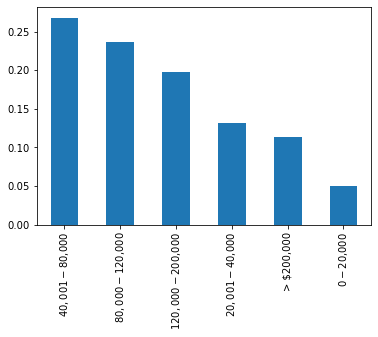

In [19]:
income_category = df['income_cat'].value_counts(normalize=True)
income_category.plot.bar()

count     8.000000
mean     29.932559
std      12.067577
min      11.640449
25%      21.751579
50%      30.258333
75%      38.985937
max      46.000000
Name: q9_if_yes, dtype: float64


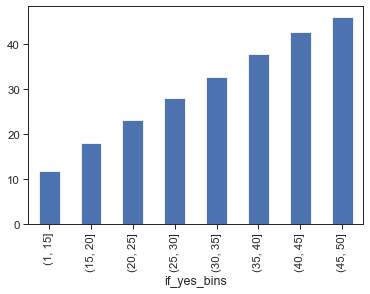

In [158]:
price_category = df.groupby(['if_yes_bins'])['q9_if_yes'].agg('mean')
price_category.plot.bar()
print(price_category.describe())

# z = df['q9_if_yes']
plt.axvline(price_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.axvline(price_category.median(), color='b', linestyle='dashed', linewidth=2)

In [22]:
df.corr()

,q3_age,q6_taxis,q7_rideshare,q8_flying_taxi,q9_if_yes
q3_age,1.000000,NaN,NaN,NaN,-0.000523
q6_taxis,NaN,NaN,NaN,NaN,NaN
q7_rideshare,NaN,NaN,NaN,NaN,NaN
q8_flying_taxi,NaN,NaN,NaN,NaN,NaN
q9_if_yes,-0.000523,NaN,NaN,NaN,1.000000


In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
q3_age,499.0,46.925852,17.295115,18.0,32.00,47.0,62.0,76.0
q9_if_yes,400.0,23.180000,9.278082,5.0,16.75,23.0,29.0,46.0


In [24]:
df.describe(include=object).T

,count,unique,top,freq
q1_email,500,500,emailofnewyorker+99@gmail.com,1
q4_income,499,6,"$40,001 - $80,000",134
q10_if_no,100,10,I think it is more unsafe than taxis,23


The above snapshot gives us an idea of largest category of **(25%) of respondents** in income category of **40001-80000.** 

The top safety concern - needs to be normalised further as the category of concern is unclear from the above description of "I think it is more unsafe than taxis"

# User Research - Visualisation

To inform our future product marketing efforts, we’ll want to extract the following:

### Q1. Is there an inclination of better Flyber adoption based on `gender`, `age`, `income level`, or `neighborhood of residence`?

In [25]:
df.groupby(['q4_income','yesorno'])['q4_income'].count().unstack('yesorno')

yesorno,N,Y
q4_income,,
"$0 - $20,000",5,20
"$120,000 - $200,000",14,85
"$20,001 - $40,000",13,53
"$40,001 - $80,000",28,106
"$80,000 - $120,000",24,94
"> $200,000",15,42


Text(0, 0.5, 'Count ')

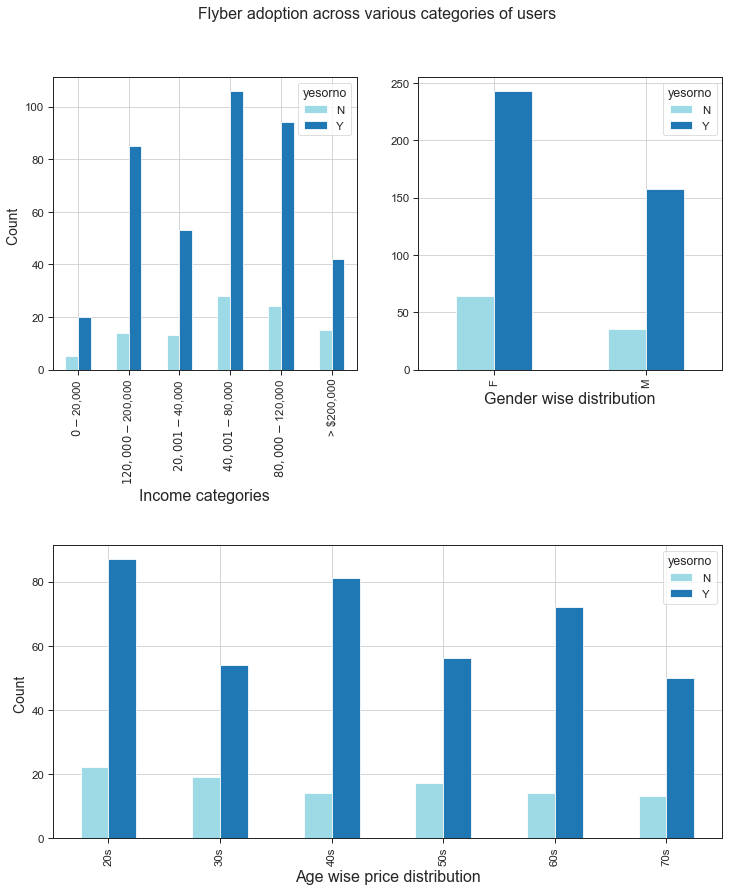

In [184]:
fig = plt.figure(figsize=(12,14), linewidth=2)
fig.suptitle('Flyber adoption across various categories of users', size=16, y=0.95)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

fig.subplots_adjust(hspace=0.6)

df.groupby(['q4_income','yesorno'])['q1_email'].count().unstack('yesorno').plot.bar(ax=ax1, rot=90, grid=True, cmap='tab20_r')
df.groupby(['q2_gender','yesorno'])['q1_email'].count().unstack('yesorno').plot.bar(ax=ax2, grid=True, cmap='tab20_r')
df.groupby(['age_bins','yesorno'])['q1_email'].count().unstack('yesorno').plot.bar(ax=ax3, grid=True, cmap='tab20_r')

ax1.set_xlabel('Income categories', fontsize=16)
ax2.set_xlabel('Gender wise distribution', fontsize=16)
ax3.set_xlabel('Age wise price distribution', fontsize=16)
ax1.set_ylabel('Count ', fontsize=14)
ax3.set_ylabel('Count ', fontsize=14)


yesorno                                             N  Y
q5_neighborhood                                         
West Harlem                                         5  1
Inwood                                              3  1
Lower East Side                                     2  2
Little Syria                                        2  3
Little Italy                                        1  3
West Village                                        1  3
Downtown Manhattan                                  2  3
Marcus Garvey Park, Mount Morris Historical Dis...  1  3
Cooperative Village                                 2  3
Radio Row                                           1  3


Text(0, 0.5, "Count of yes's and no's")

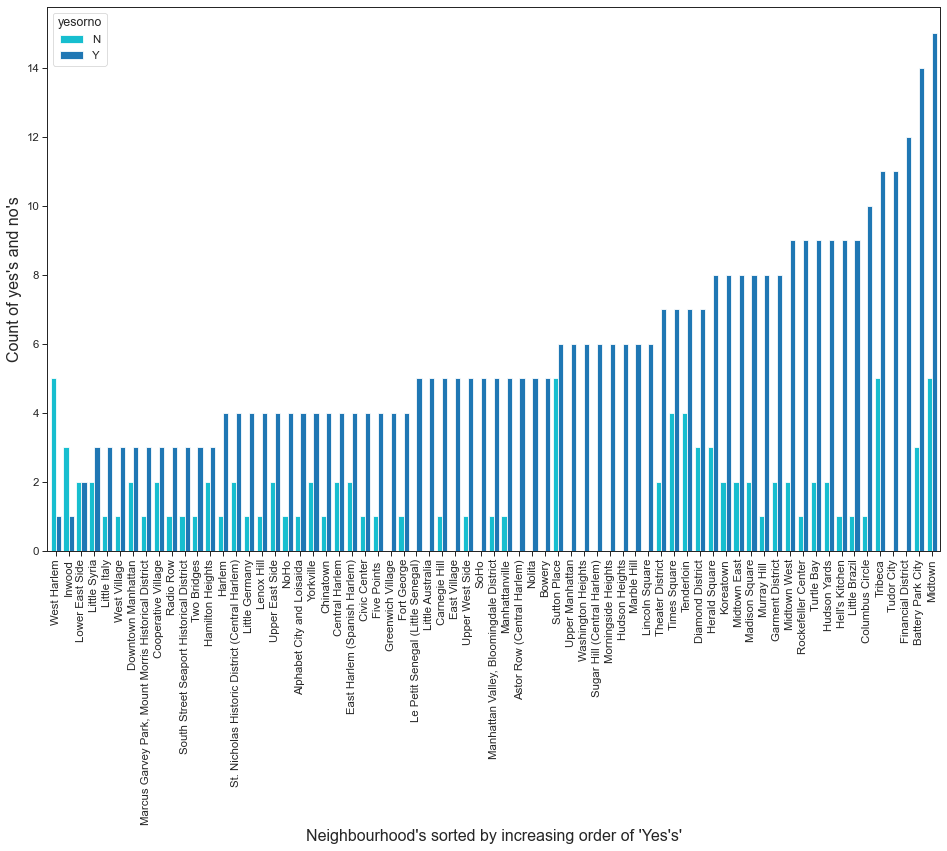

In [146]:
# We have 138 neighborhood wise grouping

fig,ax = plt.subplots(1,figsize =(16,10))

t1 = df.groupby(['q5_neighborhood','yesorno'])['q1_email'].count().unstack('yesorno').sort_values('Y')
t1.plot.bar(rot=90, width=.8, ax=ax, cmap='tab10_r')
print(t1.head(10))

ax.set_xlabel('Neighbourhood\'s sorted by increasing order of \'Yes\'s\'', fontsize=16)
ax.set_ylabel('Count of yes\'s and no\'s', fontsize=16)


In [28]:
df['q5_neighborhood'].unique()

['Hudson Yards', 'Fort George', 'Theater District', 'Tribeca', 'Yorkville', ..., 'Hudson Heights', 'Le Petit Senegal (Little Senegal)', 'SoHo', 'Two Bridges', 'West Village']
Length: 69
Categories (69, object): ['Hudson Yards', 'Fort George', 'Theater District', 'Tribeca', ..., 'Le Petit Senegal (Little Senegal)', 'SoHo', 'Two Bridges', 'West Village']

In [181]:
t_combined = t1.join(t2, how='inner', on ='q5_neighborhood'  ).rename(columns = {'Y': 'Yes', 'N': 'No','q9_if_yes':'Price per mile'}, inplace = False)
print(t_combined.head())
t_combined.sort_values(by='Price per mile',ascending=False).head(20)


                 No  Yes  Price per mile
q5_neighborhood                         
West Harlem       5    1       23.000000
Inwood            3    1       34.000000
Lower East Side   2    2       28.000000
Little Syria      2    3       19.000000
Little Italy      1    3       25.333333


,No,Yes,Price per mile
q5_neighborhood,,,
Inwood,3,1,34.000000
Financial District,0,12,32.833333
Bowery,0,5,32.800000
Battery Park City,3,14,32.714286
Columbus Circle,1,10,30.100000
Tribeca,5,11,29.363636
Lower East Side,2,2,28.000000
West Village,1,3,27.333333
Downtown Manhattan,2,3,27.000000


### Q2. What is the distribution of `potential price per mile` based on `gender`, `age`, `income level`, and `neighborhood` of residence?

In [30]:
table = df.groupby(['q5_neighborhood'])['q9_if_yes'].agg('mean')

In [31]:
print(table.mean())
print(table.std())
table10 = table.sort_values(ascending = False).head(10)
print(table10.mean())
print(table10.std())

22.76221532091097
3.9422416192382164
30.043030303030303
2.858488271853353


q5_neighborhood
Alphabet City and Loisaida    16.500000
Civic Center                  16.750000
Washington Heights            16.833333
Tenderloin                    17.857143
Times Square                  18.000000
Carnegie Hill                 18.400000
Chinatown                     18.500000
NoHo                          18.750000
Two Bridges                   19.000000
East Village                  19.000000
Name: q9_if_yes, dtype: float64
count    69.000000
mean     22.762215
std       3.942242
min      16.500000
25%      19.750000
50%      22.333333
75%      24.750000
max      34.000000
Name: q9_if_yes, dtype: float64


Text(0, 0.5, 'Mean price in miles ')

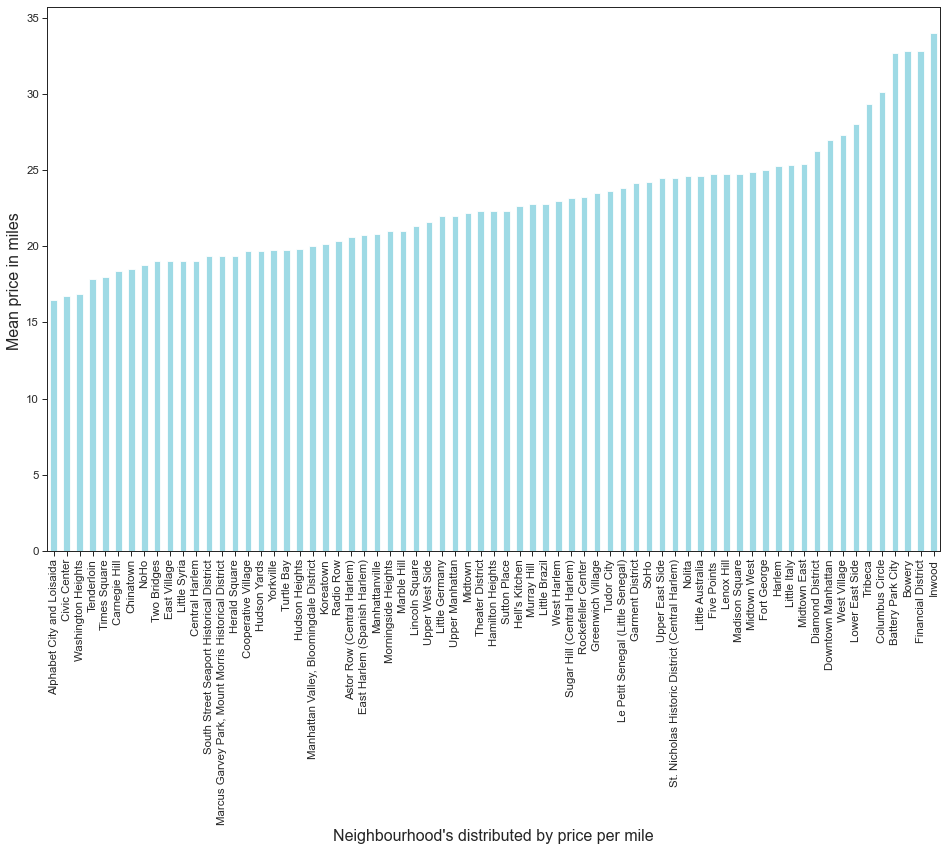

In [161]:
# We have 138 neighborhood wise grouping

fig,ax = plt.subplots(1,figsize =(16,10))

t2 = df.groupby(['q5_neighborhood'])['q9_if_yes'].agg('mean').sort_values()
t2.plot.bar(sort_columns=True, cmap='tab20_r')
print(t2.head(10))
print(t2.describe())
ax.set_xlabel('Neighbourhood\'s distributed by price per mile', fontsize=16)
ax.set_ylabel('Mean price in miles ', fontsize=16)

# z = df['q9_if_yes']
# plt.axvline(z.mean(), color='r', linestyle='dashed', linewidth=3)
# plt.axvline(z.median(), color='b', linestyle='dashed', linewidth=2)

In [33]:
df.groupby(['q5_neighborhood'])['q9_if_yes'].agg('mean').describe()

count    69.000000
mean     22.762215
std       3.942242
min      16.500000
25%      19.750000
50%      22.333333
75%      24.750000
max      34.000000
Name: q9_if_yes, dtype: float64

Text(0, 0.5, 'Mean price in miles ')

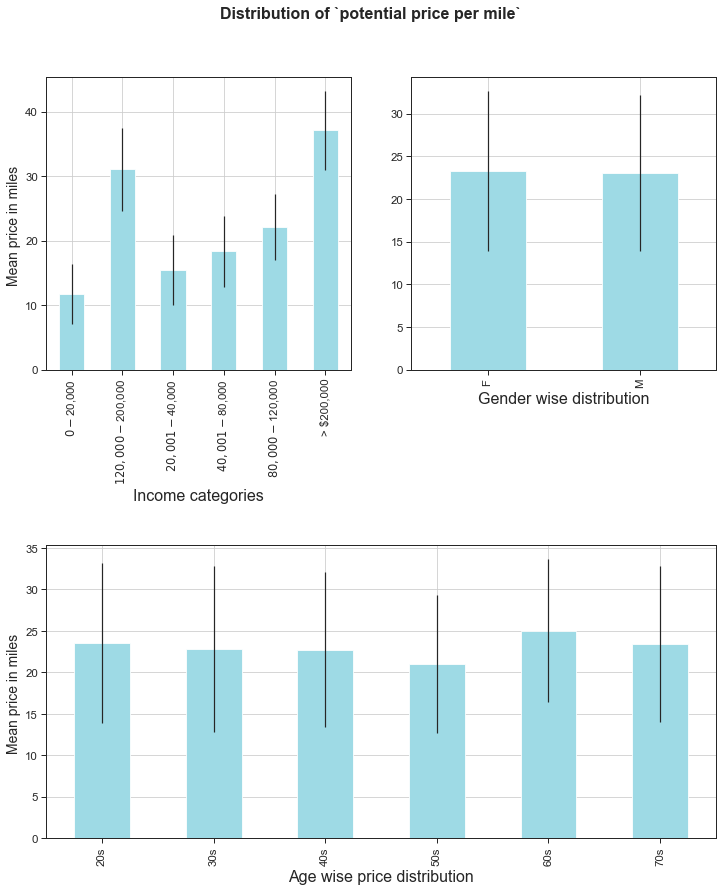

In [134]:
fig = plt.figure(figsize=(12,14), linewidth=1)
fig.suptitle("Distribution of `potential price per mile`", size=16, y=0.95, weight='bold')

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)
fig.subplots_adjust(hspace=0.6)


df.groupby(['q4_income'])['q9_if_yes'].agg(['mean','std']).plot.bar(yerr = 'std', rot=90,  ax=ax1,grid=True, legend = False, cmap='tab20_r')
# for ax1 in ax1:
#     for row in t1:
#         print(row)
#         plt.text(row.get_x(), row.get_y(), row.get_height())
    
df.groupby(['q2_gender'])['q9_if_yes'].agg(['mean','std']).plot.bar(yerr = 'std',ax=ax2, grid=True, legend = False, cmap='tab20_r')
df.groupby(['age_bins'])['q9_if_yes'].agg(['mean','std']).plot.bar(yerr = 'std', ax=ax3, grid=True, legend = False, cmap='tab20_r')

ax1.set_xlabel('Income categories', fontsize=16)
ax2.set_xlabel('Gender wise distribution', fontsize=16)
ax3.set_xlabel('Age wise price distribution', fontsize=16)
ax1.set_ylabel('Mean price in miles ', fontsize=14)
ax3.set_ylabel('Mean price in miles ', fontsize=14)
# plt.subplots_adjust(bottom=0.9)



### Q3. What is the different `personas/segments` of `negative sentiment` towards not using a flying taxi car service?

Text(0.5, 1.0, 'Readiness of users for Flyber')

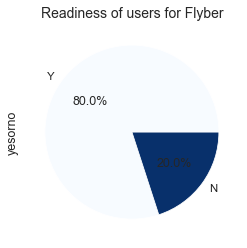

In [91]:
# Pie chart

df['yesorno'].value_counts().plot.pie(autopct="%.1f%%", layout=111, cmap ='Blues')
plt.title("Readiness of users for Flyber", fontsize=14)



Text(0.5, 1.0, 'Segments of Negative sentiment')

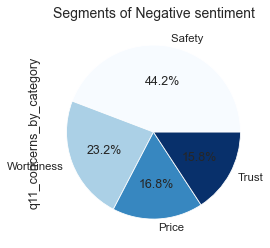

In [95]:
df['q11_concerns_by_category'].value_counts().plot.pie(autopct="%.1f%%", cmap ='Blues')
plt.title("Segments of Negative sentiment", fontsize=14)

In [20]:
#grouping the concerns by category

print(df['q11_concerns_by_category'].value_counts())
df['q11_concerns_by_category'].isnull().sum()

Safety        42
Worthiness    22
Price         16
Trust         15
Name: q11_concerns_by_category, dtype: int64


405

### Others

Text(0.5, 0.98, 'Age wise readiness to Flyber service ')

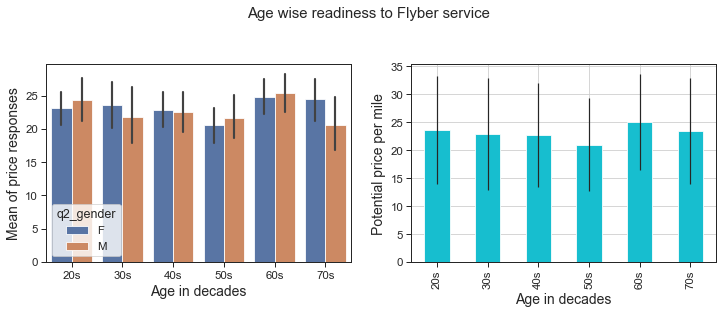

In [49]:
#styles

# style.use('seaborn')
sns.set_theme(style="darkgrid")

sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.3,)


#subplots design

fig = plt.figure(figsize=(12,8), linewidth=2)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
# ax3=fig.add_subplot(212)

#plot1

sns.barplot(y= 'q9_if_yes', x = 'age_bins',hue ='q2_gender',data=df, ax=ax1)
ax1.set_xlabel('Age in decades', fontsize=14)
ax1.set_ylabel('Mean of price responses' , fontsize=14)


#plot2

t = df.groupby(['age_bins'])['q9_if_yes'].agg(['mean','std'])
t.plot.bar(yerr ='std', legend = False, ax=ax2, cmap='tab10_r', grid=True)


ax2.set_xlabel('Age in decades', fontsize=14)
ax2.set_ylabel('Potential price per mile', fontsize=14)

fig.suptitle('Age wise readiness to Flyber service ') #fontsize=16,weight='bold',color='navy'

# #plot2

# t1 = df[['age_bins','q9_if_yes']]
# t1.plot.bar( np.arange(t1.shape[1]), t1.mean(), yerr=[t1.mean()-t1.min(), t1.max()-t1.mean()],ax=ax3)

